# Optimization of Algorithms problems

## Exercise 1
### Code Optimization for Text Processing

You are provided with a text processing code to perform the following operations:

1. Convert all text to lowercase.
2. Remove punctuation marks.
3. Count the frequency of each word.
4. Show the 5 most common words.

The code works, but it is inefficient and can be optimized. Your task is to identify areas that can be improved and rewrite those parts to make the code more efficient and readable.

In [65]:
import string

def process_text(text):
    # Text to lowercase
    text = text.lower()

    # Remove punctuation
    for p in string.punctuation:
        text = text.replace(p, "")

    # Split text into words
    words = text.split()

    # Count frecuencies
    frequencies = {}
    for w in words:
        if w in frequencies:
            frequencies[w] += 1
        else:
            frequencies[w] = 1

    sorted_frequencies = sorted(frequencies.items(), key = lambda x: x[1], reverse = True)

    # Get 5 most-common words
    top_5 = sorted_frequencies[:5]
    
    for w, frequency in top_5:
        print(f"'{w}': {frequency} times")

text = """
    In the heart of the city, Emily discovered a quaint little café, hidden away from the bustling streets. 
    The aroma of freshly baked pastries wafted through the air, drawing in passersby. As she sipped on her latte, 
    she noticed an old bookshelf filled with classics, creating a cozy atmosphere that made her lose track of time.
"""
process_text(text)

'the': 5 times
'of': 3 times
'in': 2 times
'a': 2 times
'she': 2 times


Points to optimize:

1. **Removal of punctuation marks**: Using `replace` in a loop can be inefficient, especially with long texts. Look for a more efficient way to remove punctuation marks.
2. **Frequency count**: The code checks for the existence of each word in the dictionary and then updates its count. This can be done more efficiently with certain data structures in Python.
3. **Sort and select:** Consider if there is a more direct or efficient way to get the 5 most frequent words without sorting all the words.
4. **Modularity**: Break the code into smaller functions so that each one performs a specific task. This will not only optimize performance, but also make the code more readable and maintainable.

In [66]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
def process_text(text):
    # Text to lowercase
    text = text.lower()

    # Remove punctuation
    # Create mapping table
def remove_punctuation(text):
    trans_table = string.maketrans(",", string.punctuation)
    return text.translator(trans_table)
    
    # Count frecuencies
    frequencies = {}
    for w in words:
        if w in frequencies:
            frequencies[w] += 1
        else:
            frequencies[w] = 1

    sorted_frequencies = sorted(frequencies.items(), key = lambda x: x[1], reverse = True)

    # Get 5 most-common words
    top_5 = sorted_frequencies[:5]
    
    for w, frequency in top_5:
        print(f"'{w}': {frequency} times")

text = """
    In the heart of the city, Emily discovered a quaint little café, hidden away from the bustling streets. 
    The aroma of freshly baked pastries wafted through the air, drawing in passersby. As she sipped on her latte, 
    she noticed an old bookshelf heart heart café café café filled with classics, creating a cozy atmosphere that made her lose track of time.
"""
process_text(text)

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
!pip install nltk
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download(['punkt','stopwords'])
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(text)


# Regular expression to match punctuation
cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token)]
filtered_tokens = [word for word in cleaned_tokens if word.lower() not in stop_words]

print(" ".join(cleaned_tokens))
print(Counter(filtered_tokens).most_common(5))



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
In the heart of the city Emily discovered a quaint little café hidden away from the bustling streets The aroma of freshly baked pastries wafted through the air drawing in passersby As she sipped on her latte she noticed an old bookshelf heart heart café café café filled with classics creating a cozy atmosphere that made her lose track of time
[('café', 4), ('heart', 3), ('city', 1), ('Emily', 1), ('discovered', 1)]


[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


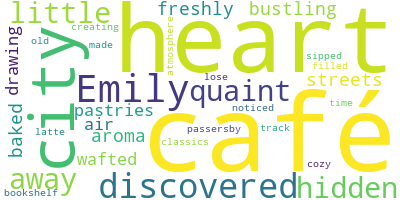

In [80]:
!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

long_string = ','.join(filtered_tokens)

wordcloud.generate(long_string)

wordcloud.to_image()


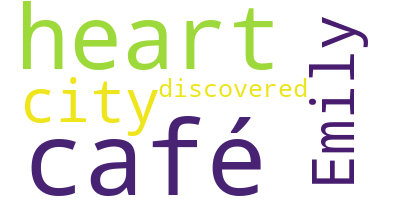

In [85]:
from collections import Counter
word_freq = Counter(long_string.split(","))
wordcloud.generate_from_frequencies(dict(word_freq.most_common(5)))
wordcloud.to_image()
#print(word_freq.most_common(5))


## Exercise 2
### Code Optimization for List Processing

You have been given a code that performs operations on a list of numbers for:

1. Filter out even numbers.
2. Duplicate each number.
3. Add all numbers.
4. Check if the result is a prime number.

The code provided achieves its goal, but it may be inefficient. Your task is to identify and improve the parts of the code to increase its efficiency.

In [70]:
import math

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def process_list(list_):
    filtered_list = []
    for num in list_:
        if num % 2 == 0:
            filtered_list.append(num)
    
    duplicate_list = []
    for num in filtered_list:
        duplicate_list.append(num * 2)
        
    sum = 0
    for num in duplicate_list:
        sum += num

    prime = is_prime(sum)
    
    return sum, prime

list_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result, result_prime = process_list(list_)
print(f"Result: {result}, ¿Prime? {'Yes' if result_prime else 'No'}")

Result: 60, ¿Prime? No


Points to optimize:

1. **Filter numbers**: The code goes through the original list to filter out even numbers. Consider a more efficient way to filter the list.
2. **Duplication**: The list is traversed multiple times. Is there a way to do this more efficiently?
3. **Summing**: The numbers in a list are summed through a loop. Python has built-in functions that can optimize this.
4. **Function `is_prime`**: While this function is relatively efficient, investigate if there are ways to make it even faster.
5. **Modularity**: Consider breaking the code into smaller functions, each focused on a specific task.

In [71]:
# TODO

Both exercises will help you improve your code performance optimization skills and give you a better understanding of how different data structures and programming techniques can affect the efficiency of your code.